In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import colors
from matplotlib.colors import LogNorm

%matplotlib inline
from scipy.optimize import curve_fit, minimize
import strax
import straxbra
from matplotlib.ticker import AutoMinorLocator
from matplotlib.image import NonUniformImage
import pandas as pd
import patrick_stylez as ps
from mpl_toolkits.mplot3d import Axes3D


Using TensorFlow backend.


In [3]:

    

left_edge  = [0, 0]
right_edge = [40500.0, -71.5]
a = ((right_edge[1])-(left_edge[1])) / ((right_edge[0])-(left_edge[0]))
b = (right_edge[1]) - a * (right_edge[0])
fiducial_r = 21

x_positions_all = {}
y_positions_all = {}
z_positions_all = {}

x_positions_raw_all = {}
y_positions_raw_all = {}
z_positions_raw_all = {}

r_positions_fiducial_all = {}
r_positions_all = {}
drift_time_all = {}


run_list = ['00162', '00178', '00163']
#-----------kr-------cs----------#
for run in run_list:
    
    def CutCondition(waveform, integral,width,i):  
        
        if run == '00162':
            
            FirstPeak_area = sum(waveform[:15])
            SecondPeak_area = sum(waveform[15:])    
            if  FirstPeak_area > 100 and FirstPeak_area < 600 and SecondPeak_area > 40 and SecondPeak_area  < 200: 
                return(True)
            else:
                return(False)
        if run == '00178':
            
            if integral[i] > 100 and integral[i] < 4000 and width[i] > 30 and width[i] < 50:
                return(True)
            else:
                return(False)
            
        if run == '00163':
            
            FirstPeak_area = sum(waveform[:15])
            SecondPeak_area = sum(waveform[15:])    
            if  FirstPeak_area > 100 and FirstPeak_area < 600 and SecondPeak_area > 40 and SecondPeak_area  < 200: 
                return(True)
            else:
                return(False)

    
    def PrintWaveform(waveform,i):

        fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(1,7,sharex=False, figsize=(30, 5))
        ax1.plot(waveform[i])
        ax2.plot(waveform[i+1])
        ax3.plot(waveform[i+2])
        ax4.plot(waveform[i+3])
        ax5.plot(waveform[i+4])
        ax6.plot(waveform[i+5])
        ax7.plot(waveform[i+6])
        plt.show()


    def drifttime_to_z(t):
        return a * t + b

    def S2_found(integral, width):
        #maximum_S2 = max(waveform)
        if integral > 500 and width >200 and width < 2000:
            return True
        else:
            return False

    
    def Process(waveform, i): 
        SelectionCutFlag = CutCondition(waveform[i], integral, width, i)
        if SelectionCutFlag == True:


            j = 1
            counter_timestamp = timestamp[i+j]
            threshold_timestamp = timestamp[i] + 45000
            while threshold_timestamp >= counter_timestamp and  S2_found(integral = integral[i+j], width = width[i+j]) == False:  
                j += 1
                counter_timestamp = timestamp[i+j]
            else:
                if S2_found(integral = integral[i+j], width = width[i+j]):  
                    k=1 
                    s2_counter_timestamp = timestamp[i+j+k]
                    while threshold_timestamp >= s2_counter_timestamp and S2_found(integral = integral[i+j+k], width = width[i+j+k]) == False:
                        k += 1
                        s2_counter_timestamp = timestamp[i+j+k]
                    else:
                        if threshold_timestamp <= s2_counter_timestamp:
                            
                            if area_per_channel[i+j][1] > 0 and area_per_channel[i+j][2] > 0 \
                                and area_per_channel[i+j][3] > 0 and area_per_channel[i+j][4] > 0 \
                                and area_per_channel[i+j][5] > 0 and area_per_channel[i+j][6] > 0 \
                                and area_per_channel[i+j][7] > 0 \
                                :
                            
                                    r_position = np.sqrt(x_position[i+j]**2 + y_position[i+j]**2)
                                    z_position = drifttime_to_z(timestamp[i+j] - timestamp[i])
                                    time       = timestamp[i+j] - timestamp[i]
                                    drift_time.append(time)
                                    r.append(r_position)
                                    x_raw.append(x_position[i+j])
                                    y_raw.append(y_position[i+j])
                                    z_raw.append(z_position)
                                    if r_position <= fiducial_r and z_position >= -75:
                                        r_fiducial.append(r_position)
                                        x.append(x_position[i+j])
                                        y.append(y_position[i+j])

                                        z.append(z_position)





                    return
                else:
                    return




    ctx = straxbra.XebraContext()
    peaks_data = ctx.get_array(run, 'peaks')
    position_data = ctx.get_array(run, 'peak_positions')

    waveform = peaks_data['data']
    integral = peaks_data['area']
    width = peaks_data['width'][:,5]
    area_per_channel = peaks_data['area_per_channel']
    timestamp = peaks_data['time']
    x_position = position_data['x']
    y_position = position_data['y']

    drift_time = []  
    z = []
    r = []
    r_fiducial = []
    x = []
    y = []
    x_raw = []
    y_raw = []
    z_raw = []
    
    x_positions_all.update({run:x})
    y_positions_all.update({run:y})
    z_positions_all.update({run:z})
    x_positions_raw_all.update({run:x_raw})
    y_positions_raw_all.update({run:y_raw})
    z_positions_raw_all.update({run:z_raw})
    
    r_positions_fiducial_all.update({run:r_fiducial})
    r_positions_all.update({run:r})
    drift_time_all.update({run:drift_time})

    num = len(waveform)
    print_counter = 0.0
    for i in range(0,num):    
        Process(waveform,i)
        if i/num >= print_counter:
            print(round(print_counter,2), end = ' ')
            print_counter += 0.1
    print(1.0, '        Run ',run, 'done!')


0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0         Run  00162 done!
0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0         Run  00178 done!
0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0         Run  00163 done!


In [4]:
print(len(x_positions_raw_all['00162']))

111


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


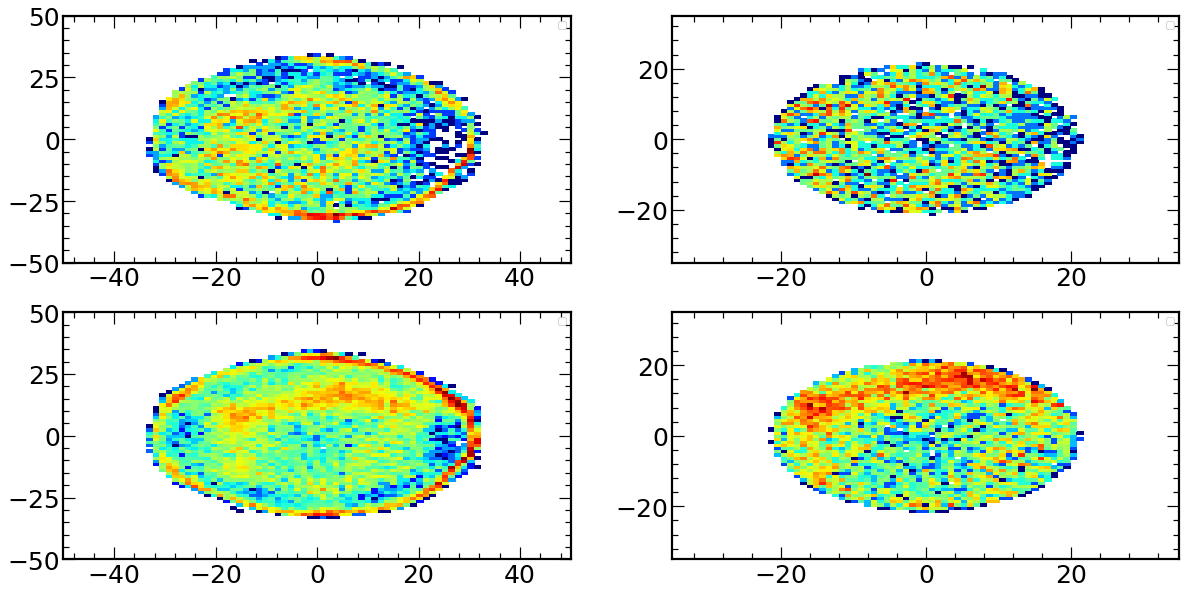

In [5]:
fig, [[ax1, ax2],[ax3, ax4]] = plt.subplots(2,2,figsize=(20,10),sharex=False, sharey=False)

#print(axes)

plt.rc('font', family='serif')
plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=25)

# Labels
label_size = 25 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

for ax in [ax1, ax2, ax3, ax4]:

        #ax = plt.gca()
        ax.tick_params(axis = 'both')
        
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2.2)
        
        ax.xaxis.set_minor_locator(AutoMinorLocator(5)) 
        ax.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
        ax.yaxis.set_minor_locator(AutoMinorLocator(5))
        ax.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
        ax.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)
    
    
    


bins_x = np.linspace(-50,50,80)
bins_y = np.linspace(-50,50,80)
bins_x_cut = np.linspace(-35,35,80)
bins_y_cut = np.linspace(-35,35,80)



counts_kr_raw, _, _ = np.histogram2d(x_positions_raw_all['00163'],y_positions_raw_all['00163'], bins=(bins_x, bins_y))
counts_kr, _, _ = np.histogram2d(x_positions_all['00163'],y_positions_all['00163'], bins=(bins_x_cut, bins_y_cut))
counts_cs_raw, _, _ = np.histogram2d(x_positions_raw_all['00178'],y_positions_raw_all['00178'], bins=(bins_x, bins_y))
counts_cs, _, _ = np.histogram2d(x_positions_all['00178'],y_positions_all['00178'], bins=(bins_x_cut, bins_y_cut))




im1 = ax1.pcolormesh(bins_x, bins_y, counts_kr_raw.T, norm=mpl.colors.LogNorm(), cmap = 'jet')
im2 = ax2.pcolormesh(bins_x_cut, bins_y_cut, counts_kr.T, norm=mpl.colors.LogNorm(), cmap = 'jet')
im3 = ax3.pcolormesh(bins_x, bins_y, counts_cs_raw.T, norm=mpl.colors.LogNorm(), cmap = 'jet')
im4 = ax4.pcolormesh(bins_x_cut, bins_y_cut, counts_cs.T, norm=mpl.colors.LogNorm(), cmap = 'jet')


#cb = plt.colorbar(im, ax=axes2, label='Counts')
# cb = plt.colorbar(im1, ax=ax1, label='Counts/bin')
# cb.set_label('Counts',size=20)
# cb.ax.tick_params(labelsize=20)
#ax.plot([], [], ' ', label="number of entries: "+str(len(x_position)))

# fig.subplots_adjust(right=0.8)
# cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
# fig.colorbar(im4, cax=cbar_ax)
# #cbar_ax = plt.colorbar(im1, ax=ax1, label='Counts/bin')
# cbar_ax.set_label('Counts',size=20)
# cbar_ax.ax.tick_params(labelsize=20)




for ax in [ax1,ax2,ax3,ax4]:
    ax.legend(prop={'size': 10})

plt.show()


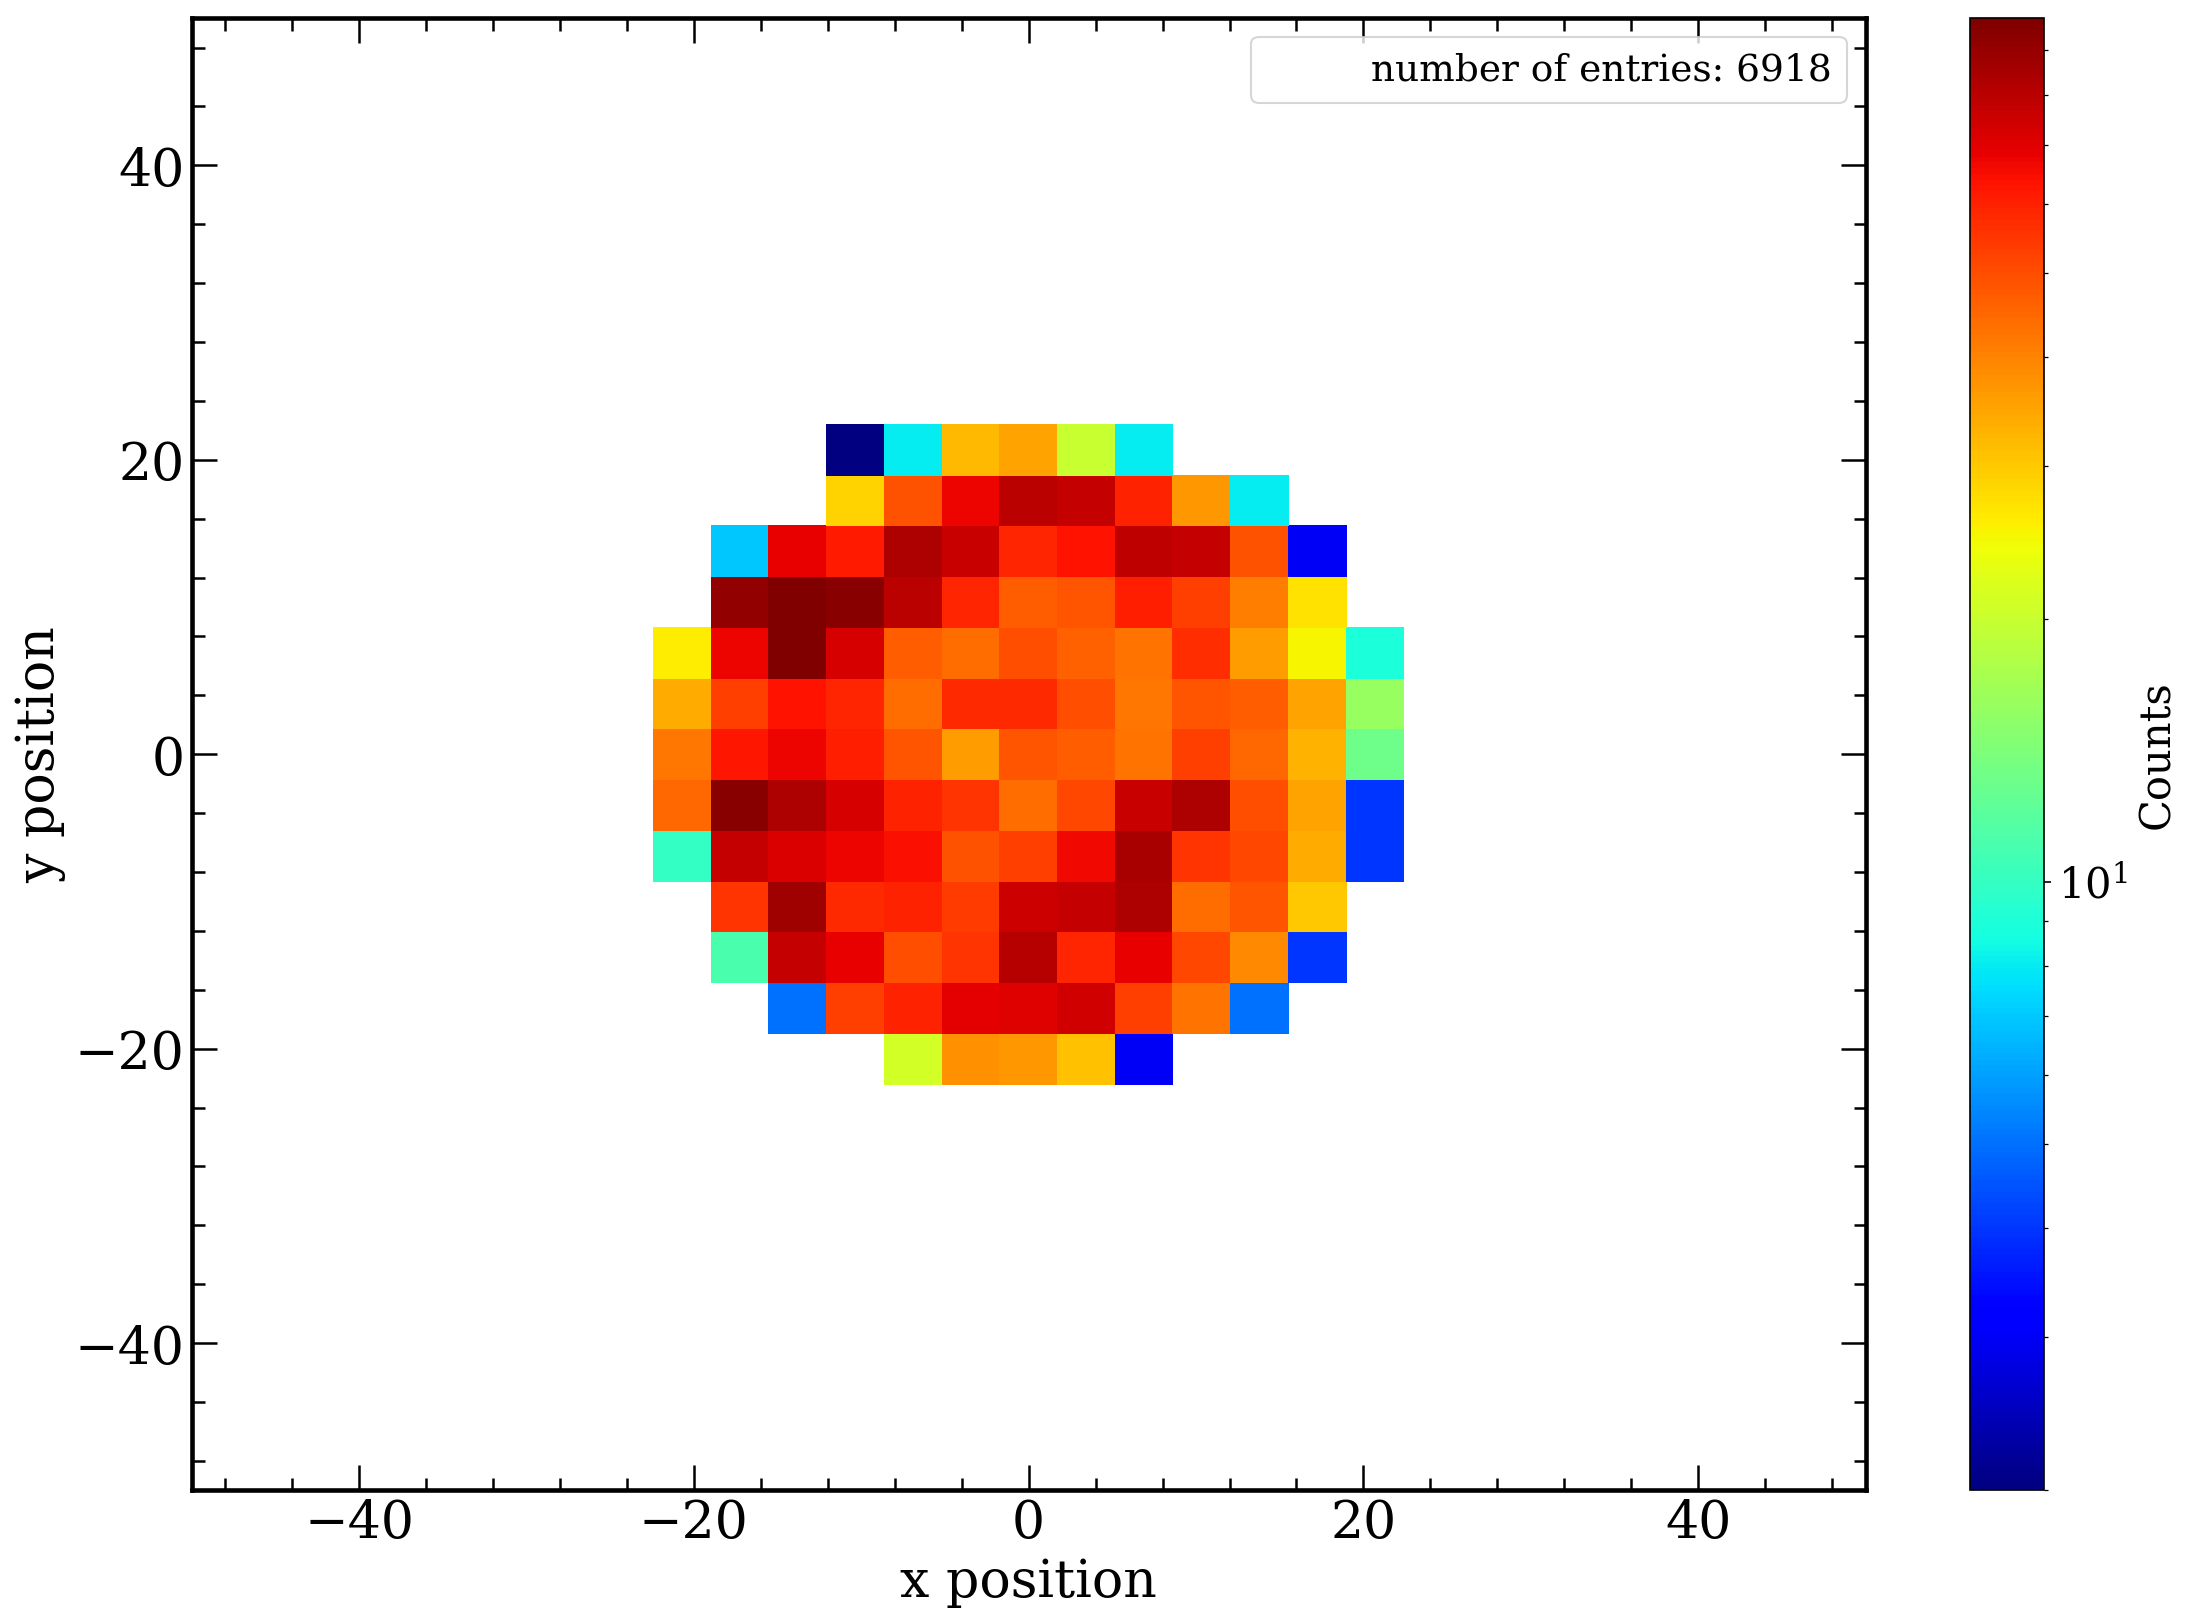

In [6]:
fig, axes = ps.styles()


bins_x = np.linspace(-50,50,30)
bins_y = np.linspace(-50,50,30)




counts, _, _ = np.histogram2d(x_positions_all['00163'],y_positions_all['00163'], bins=(bins_x, bins_y))





im = axes.pcolormesh(bins_x, bins_y, counts.T, norm=mpl.colors.LogNorm(), cmap = 'jet')



cb = plt.colorbar(im, ax=axes, label='Counts')
cb.set_label('Counts',size=20)
cb.ax.tick_params(labelsize=20)
axes.plot([], [], ' ', label="number of entries: "+str(len(x_positions_all['00163'])))
axes.set_xlabel('x position')
axes.set_ylabel('y position')


axes.legend(prop={'size': 18})

plt.show()


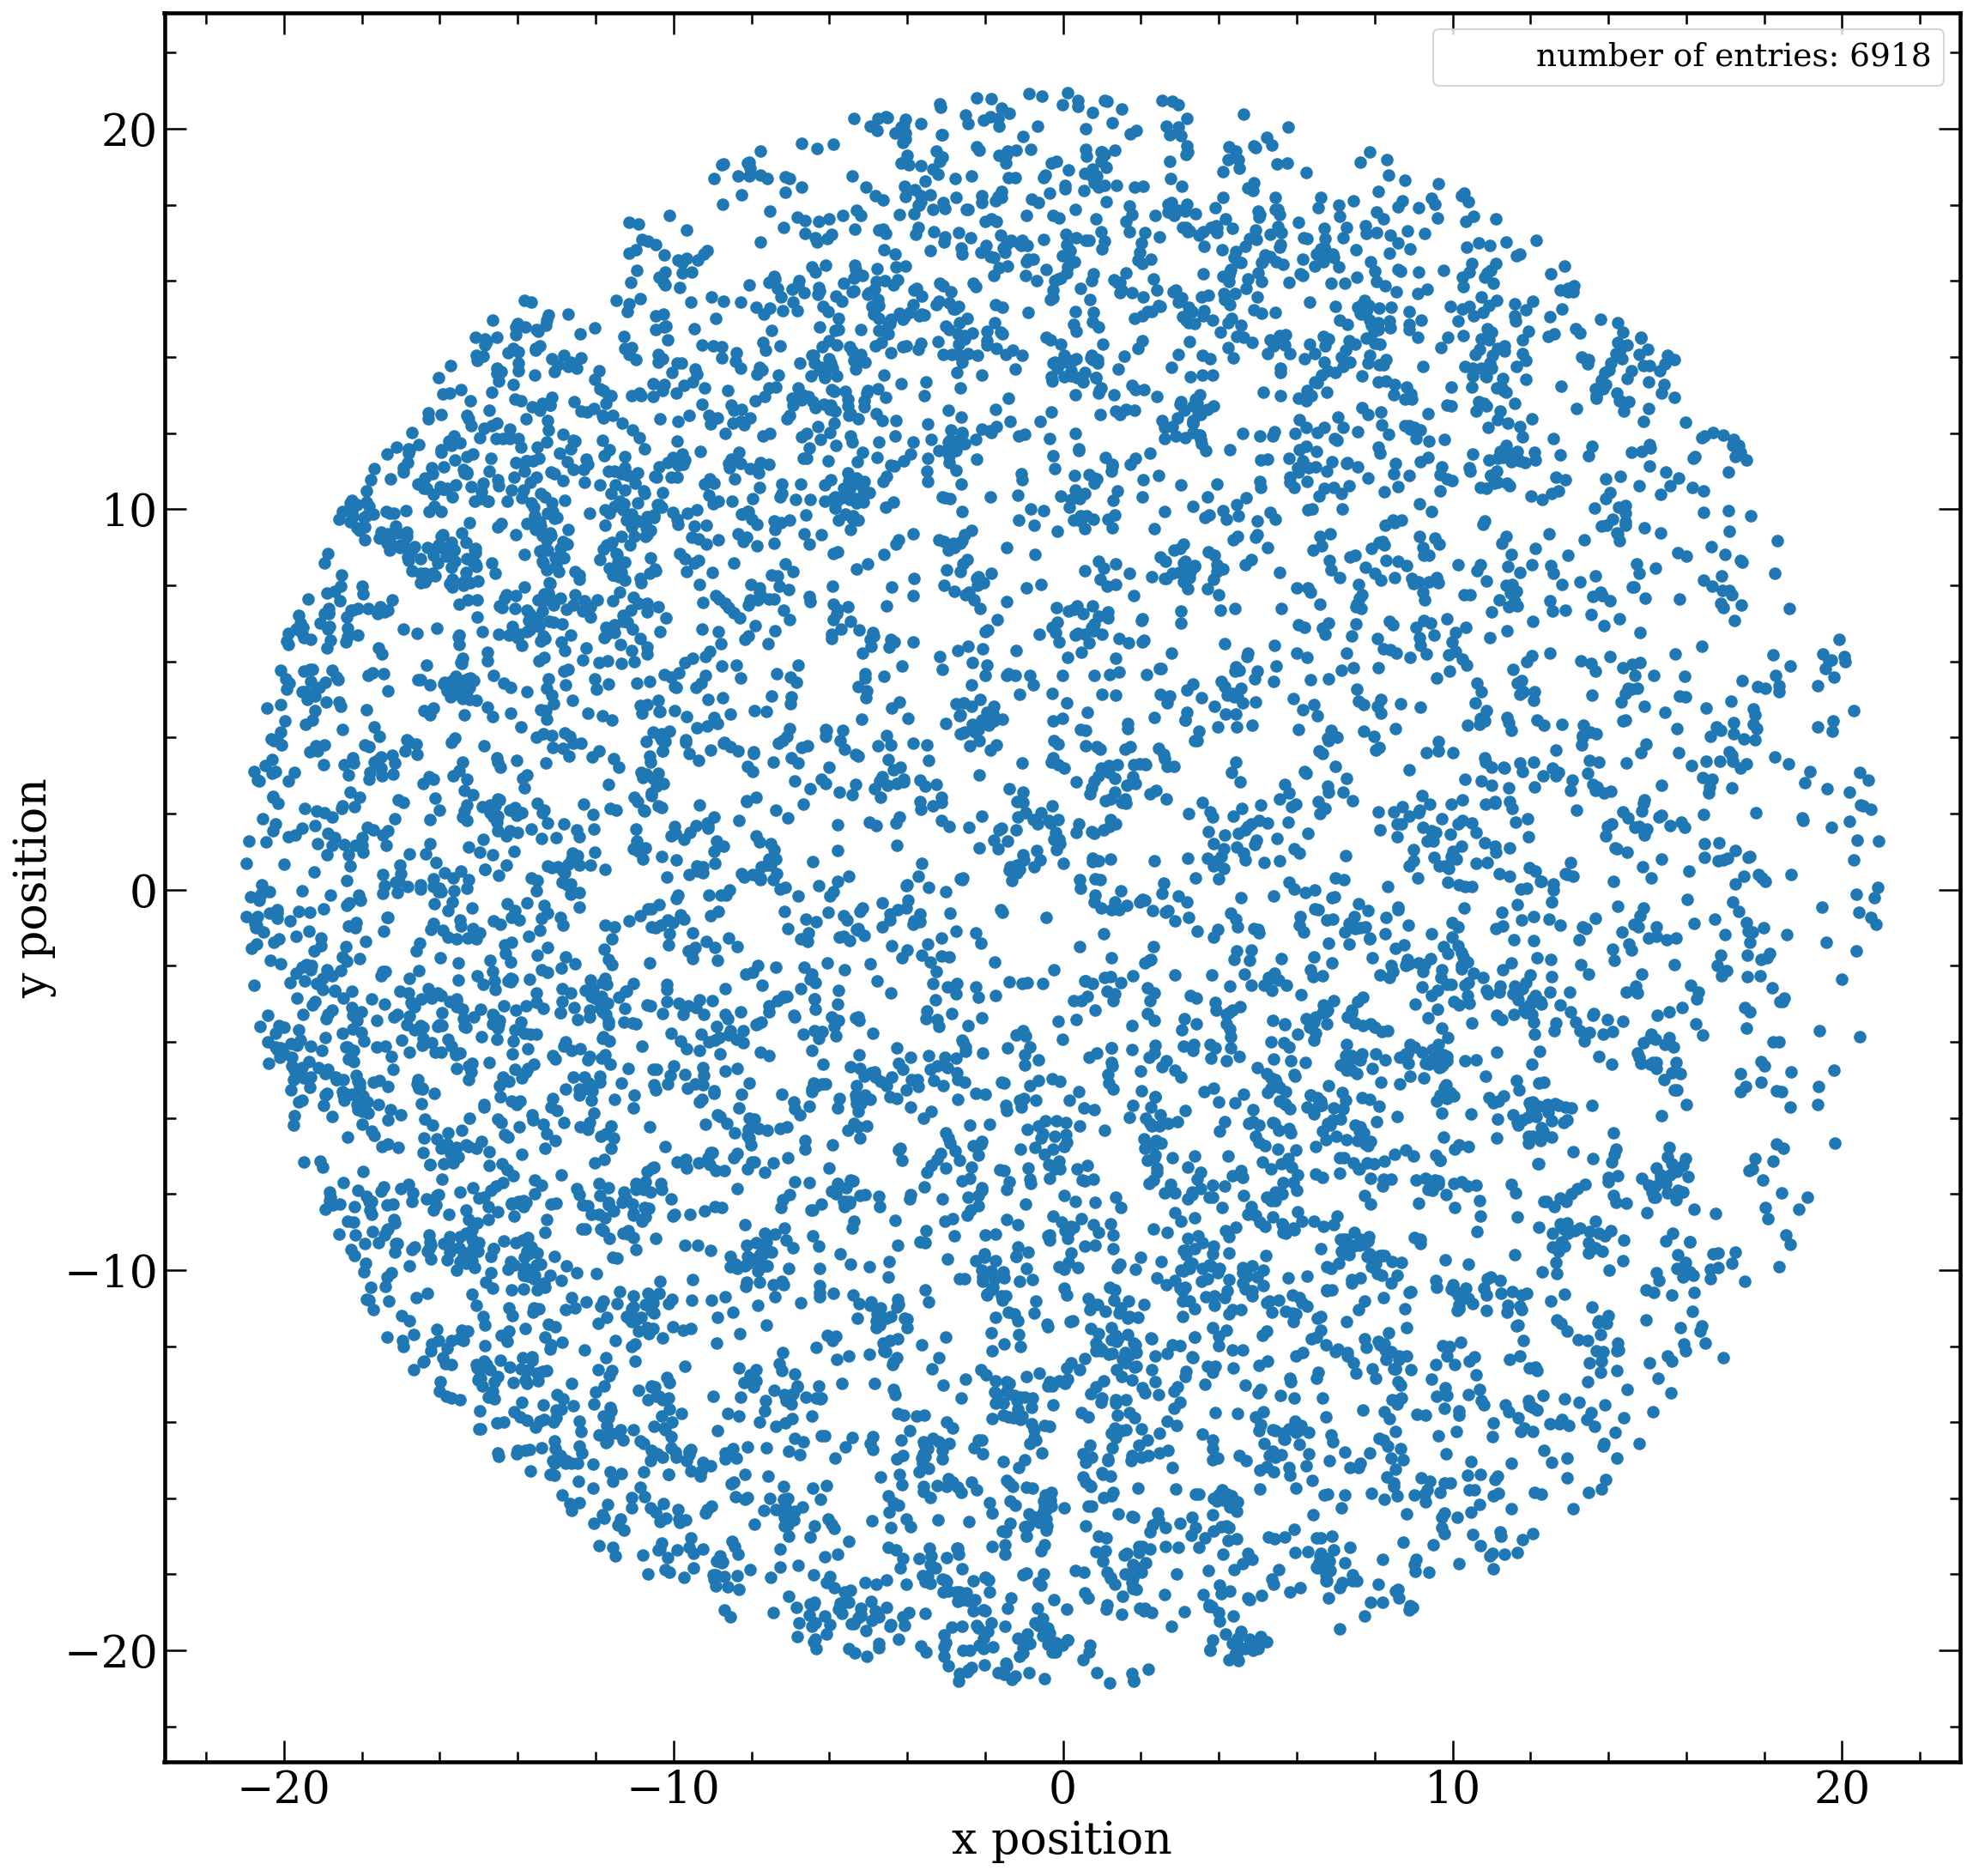

In [7]:
fig=plt.figure(figsize=(18, 18), dpi=150)
plt.rc('font', family='serif')
plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=25)
label_size = 25 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20
axes = plt.gca()
axes.tick_params(axis='both')
for axis in ['top', 'bottom', 'left', 'right']:
    axes.spines[axis].set_linewidth(2.2)
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)


bins_x = np.linspace(-35,35,80)
bins_y = np.linspace(-35,35,80)

run_id = '00163'

axes.scatter(x_positions_all[run_id],y_positions_all[run_id])





axes.plot([], [], ' ', label="number of entries: "+str(len(x_positions_all[run_id])))
axes.set_xlabel('x position')
axes.set_ylabel('y position')

currentAxis = plt.gca()
circle = plt.Circle((0., 0.), 35., color='gray', linestyle = '-', fill=False)
currentAxis.add_artist(circle)


axes.legend(prop={'size': 18})

plt.show()
